In [62]:
import numpy as np
import pandas as pd
import glob 
from matplotlib import pyplot as plt 
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px

px.defaults.template = "presentation"

In [63]:
path = 'data/*.csv'
files = glob.glob(path)
datas = []
for file in files:
    datas.append(pd.read_csv(file))

In [64]:
files

['data/seda2023_state_poolsub_ys_updated_20240205.csv',
 'data/seda2023_admindist_poolsub_ys_updated_20240205.csv']

Documentation: https://docs.google.com/spreadsheets/d/1SXoVcTiJaGTHacg_xFOqFcxJjMSdrkoGDD7D9SaRNmA/edit#gid=94402853

In [65]:
data = datas[0]

In [66]:
data

,sedafips,fips,stateabb,sedafipsname,subject,subgroup,ys_mn_2016_ol,ys_mn_2016_ol_se_adj,ys_mn_2016_eb,ys_mn_2016_eb_se_adj,...,tot_2022,tot_2023,cell_2016,cell_2017,cell_2018,cell_2019,cell_2022,cell_2023,flag_estasmt2022,flag_estasmt2023
0,1,1,AL,Alabama,mth,all,-0.272921,0.015098,-0.276134,0.012707,...,334284.0,336744.0,6.0,6.0,6.0,6.0,6.0,6.0,1,1.0
1,1,1,AL,Alabama,mth,blk,-0.676346,0.015363,-0.678782,0.013117,...,108446.0,109524.0,6.0,6.0,6.0,6.0,6.0,6.0,1,1.0
2,1,1,AL,Alabama,mth,hsp,-0.494112,0.016268,-0.496646,0.012588,...,34597.0,34903.0,6.0,6.0,6.0,6.0,6.0,6.0,1,1.0
3,1,1,AL,Alabama,mth,wht,-0.032735,0.015264,-0.040208,0.011673,...,173083.0,174069.0,6.0,6.0,6.0,6.0,6.0,6.0,1,1.0
4,1,1,AL,Alabama,rla,all,-0.070439,0.016367,-0.072882,0.012990,...,334283.0,NaN,6.0,6.0,6.0,6.0,6.0,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,56,56,WY,Wyoming,rla,blk,-0.063673,0.042599,-0.078313,0.027972,...,377.0,379.0,6.0,6.0,6.0,6.0,6.0,6.0,1,1.0
352,56,56,WY,Wyoming,rla,ecd,-0.088234,0.012355,-0.075580,0.010734,...,12479.0,12714.0,6.0,6.0,6.0,6.0,6.0,6.0,1,1.0
353,56,56,WY,Wyoming,rla,hsp,-0.133958,0.015435,-0.126248,0.012689,...,6184.0,6225.0,6.0,6.0,6.0,6.0,6.0,6.0,1,1.0
354,56,56,WY,Wyoming,rla,nec,0.400843,0.011540,0.326189,0.009263,...,30143.0,30073.0,6.0,6.0,6.0,6.0,6.0,6.0,1,1.0


In [67]:
import plotly.graph_objects as go


For One State

In [68]:
def get_state_plot(state_df):
    state_df = state_df[state_df.subgroup!='all']
    pre_ys,post_ys = [], []
    pre_yerrs,post_yerrs = [], []
    subgroups = []
    state_df = state_df[state_df.subject =='mth']
    
    #GET COVID CHANGE
    for subgroup in state_df.subgroup.unique():
        subgroups.append(subgroup)
        sub = state_df[state_df.subgroup == subgroup]
        pre_y = sub.loc[:,sub.columns.isin(['ys_mn_2019_ol'])].values[0]
        post_y = sub.loc[:,sub.columns.isin(['ys_mn_2022_ol'])].values[0]
        pre_ys.append(pre_y)
        post_ys.append(post_y)

        pre_yerr = sub.loc[:,sub.columns.isin(['ys_mn_2019_ol_se_adj'])].values[0]
        post_yerr = sub.loc[:,sub.columns.isin(['ys_mn_2022_ol_se_adj'])].values[0]
        pre_yerrs.append(pre_yerr)
        post_yerrs.append(post_yerr)
    
    
    pre_ys , post_ys = np.array(pre_ys), np.array(post_ys)
    pre_yerrs, post_yerrs = np.array(pre_yerrs),np.array(post_yerrs)
    change = np.array(post_ys)-np.array(pre_ys)
    change_errs = np.abs(change)*(np.sqrt((pre_yerrs/pre_ys)**2+(post_yerrs/post_ys)**2))
    #reshape
    size = state_df.subgroup.nunique()
    change = change.reshape(size)
    change_errs = change_errs.reshape(size)
     
    fig = go.Figure()
    colors = ['blue' if x >= 0 else 'red' for x in change]

    # Add bar trace with error bars
    fig.add_trace(go.Bar(
    x=subgroups,
    y=change,
    marker_color=colors,
    error_y=dict(type='data', array=np.array(change_errs), visible=True, color = 'white'),
    ))

    # Update layout for better visibility
    fig.update_layout(
    
    
    yaxis_title='Avg. Math Score',
    showlegend=False,  # Hide legend as color indicates direction
    )
    # choose the figure font
    font_dict=dict(family='Arial',
               size=26,
               color='black'
               )
    # general figure formatting
    fig.update_layout(font=font_dict,  # font formatting
                  plot_bgcolor='black',  # background color
                 # figure height 
                  )

    return fig


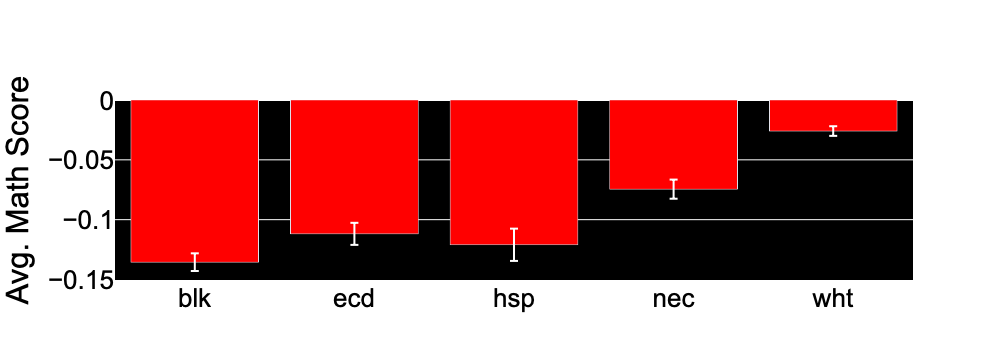

In [69]:
state_df = data[data.stateabb == 'IL']
get_state_plot(state_df)

In [70]:
data

,sedafips,fips,stateabb,sedafipsname,subject,subgroup,ys_mn_2016_ol,ys_mn_2016_ol_se_adj,ys_mn_2016_eb,ys_mn_2016_eb_se_adj,...,tot_2022,tot_2023,cell_2016,cell_2017,cell_2018,cell_2019,cell_2022,cell_2023,flag_estasmt2022,flag_estasmt2023
0,1,1,AL,Alabama,mth,all,-0.272921,0.015098,-0.276134,0.012707,...,334284.0,336744.0,6.0,6.0,6.0,6.0,6.0,6.0,1,1.0
1,1,1,AL,Alabama,mth,blk,-0.676346,0.015363,-0.678782,0.013117,...,108446.0,109524.0,6.0,6.0,6.0,6.0,6.0,6.0,1,1.0
2,1,1,AL,Alabama,mth,hsp,-0.494112,0.016268,-0.496646,0.012588,...,34597.0,34903.0,6.0,6.0,6.0,6.0,6.0,6.0,1,1.0
3,1,1,AL,Alabama,mth,wht,-0.032735,0.015264,-0.040208,0.011673,...,173083.0,174069.0,6.0,6.0,6.0,6.0,6.0,6.0,1,1.0
4,1,1,AL,Alabama,rla,all,-0.070439,0.016367,-0.072882,0.012990,...,334283.0,NaN,6.0,6.0,6.0,6.0,6.0,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,56,56,WY,Wyoming,rla,blk,-0.063673,0.042599,-0.078313,0.027972,...,377.0,379.0,6.0,6.0,6.0,6.0,6.0,6.0,1,1.0
352,56,56,WY,Wyoming,rla,ecd,-0.088234,0.012355,-0.075580,0.010734,...,12479.0,12714.0,6.0,6.0,6.0,6.0,6.0,6.0,1,1.0
353,56,56,WY,Wyoming,rla,hsp,-0.133958,0.015435,-0.126248,0.012689,...,6184.0,6225.0,6.0,6.0,6.0,6.0,6.0,6.0,1,1.0
354,56,56,WY,Wyoming,rla,nec,0.400843,0.011540,0.326189,0.009263,...,30143.0,30073.0,6.0,6.0,6.0,6.0,6.0,6.0,1,1.0


In [72]:
from jupyter_dash import JupyterDash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px


# Create Jupyter Dash app
app = JupyterDash(__name__)

# Define layout
app.layout = html.Div([
    html.H1("COVID effect on Test Scores 2019-2022"),
    
    # Dropdown menu to select a state
    dcc.Dropdown(
        id='state-selector',
        options=[{'label': state, 'value': state} for state in data['stateabb'].unique()],
        value=data['stateabb'].unique()[0],
        style={'width': '50%'}
    ),
    
    # Plot space
    dcc.Graph(id='state-plot')
])

# Define callback to update the plot based on selected state
@app.callback(
    Output('state-plot', 'figure'),
    [Input('state-selector', 'value')]
)
def update_plot(selected_state):
    filtered_data = data[data['stateabb'] == selected_state]
    
    return get_state_plot(filtered_data)

# Run the app inline in the notebook
app.run_server( host='127.0.0.1', port=8055)


Dash app running on http://127.0.0.1:8055/
